### Stock Screener Data Processing

This script fetches stock data from the Financial Modeling Prep API, removes duplicate company names, limits the dataset to 500 unique stocks, categorizes them by sector, and saves the cleaned data to `us_stocks.json`.


In [ ]:
#!/usr/bin/env python

from urllib.request import urlopen
import certifi
import json
from collections import Counter

def get_jsonparsed_data(url):
    """
    Fetch JSON data from a given URL and return the parsed result.
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

# Define the base URL and API key
BASE_URL = "https://financialmodelingprep.com/api/v3/stock-screener"
API_KEY = "IkISUKsUc1NyyjkLlAWXoTrZh5FgVgIx"

# Parameters for the screener
params = {
    "isActivelyTrading": "true",
    "isEtf": "false",
    "isFund": "false",
    "country": "US",
    "exchange": "nyse,nasdaq",
    "limit": 1000,  # Fetch extra stocks to ensure replacements
    "apikey": API_KEY
}

# Build the query URL
query = "&".join(f"{key}={value}" for key, value in params.items())
url = f"{BASE_URL}?{query}"

# Fetch the data
try:
    stock_data = get_jsonparsed_data(url)
    print(f"Fetched {len(stock_data)} stocks.")
    
    # Identify duplicates by companyName
    company_names = [stock["companyName"] for stock in stock_data]
    duplicates = [name for name, count in Counter(company_names).items() if count > 1]
    
    if duplicates:
        print("\nDuplicates found. Replacing with non-duplicate stocks.")
        # Remove duplicates and keep only one instance of each name
        unique_stocks = []
        seen_names = set()
        for stock in stock_data:
            if stock["companyName"] not in seen_names:
                unique_stocks.append(stock)
                seen_names.add(stock["companyName"])
        
        # Add non-duplicate stocks to maintain the total count of 500
        replacement_stocks = [
            stock for stock in stock_data
            if stock["companyName"] not in seen_names
        ]
        while len(unique_stocks) < 500 and replacement_stocks:
            unique_stocks.append(replacement_stocks.pop(0))
        
        # Finalize the cleaned-up data
        stock_data = unique_stocks[:500]
    else:
        print("\nNo duplicates found.")

    # Final stock count and save the results
    print(f"\nFinal stock count: {len(stock_data)}")
    with open("us_stocks.json", "w") as f:
        json.dump(stock_data, f, indent=4)
    print("Cleaned data saved to us_stocks.json")
    
    # Analyze the cleaned data: Count stocks in each sector
    sectors = [stock.get("sector", "Unknown") for stock in stock_data]
    sector_counts = Counter(sectors)
    print("\nStocks by Sector:")
    for sector, count in sector_counts.items():
        print(f"{sector}: {count}")
except Exception as e:
    print(f"An error occurred: {e}")


### Earnings Surprises Data Collection

This script loads stock data from `us_stocks.json`, creates a folder for each stock symbol, and fetches earnings surprises data from the Financial Modeling Prep API. If the earnings data does not already exist, it retrieves and saves it as `earnings_surprises.json` in the respective stock's folder.


In [25]:
#!/usr/bin/env python

import os
import json
from urllib.request import urlopen
import certifi

def get_jsonparsed_data(url):
    """
    Fetch JSON data from the given URL and return the parsed result.
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

# Define your API key
API_KEY = "IkISUKsUc1NyyjkLlAWXoTrZh5FgVgIx"

# Path to the JSON file
json_file_path = "us_stocks.json"

# Load the stock data
try:
    with open(json_file_path, "r") as f:
        stocks = json.load(f)
        print(f"Loaded {len(stocks)} stocks from {json_file_path}.")
except FileNotFoundError:
    print(f"Error: File {json_file_path} not found.")
    exit(1)

# Base URL for earnings surprises
base_url = "https://financialmodelingprep.com/api/v3/earnings-surprises"

# Process each stock
for stock in stocks:
    symbol = stock["symbol"]
    folder_name = symbol
    
    # Create folder for the stock symbol
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        print(f"Created folder: {folder_name}")
    
    # Check if the file already exists
    file_path = os.path.join(folder_name, "earnings_surprises.json")
    if os.path.exists(file_path):
        print(f"Earnings surprises data already exists for {symbol}, skipping.")
        continue
    
    # Fetch earnings surprises data
    url = f"{base_url}/{symbol}?apikey={API_KEY}"
    try:
        earnings_data = get_jsonparsed_data(url)
        if earnings_data:  # Ensure there's data
            # Save the earnings surprises data to a file in the folder
            with open(file_path, "w") as f:
                json.dump(earnings_data, f, indent=4)
            print(f"Saved earnings surprises for {symbol} to {file_path}.")
        else:
            print(f"No earnings surprises data for {symbol}.")
    except Exception as e:
        print(f"An error occurred while fetching data for {symbol}: {e}")

print("Completed processing all stocks.")


Loaded 500 stocks from us_stocks.json.
Earnings surprises data already exists for AAPL, skipping.
Earnings surprises data already exists for NVDA, skipping.
Earnings surprises data already exists for MSFT, skipping.
Earnings surprises data already exists for GOOG, skipping.
Earnings surprises data already exists for AMZN, skipping.
Earnings surprises data already exists for META, skipping.
Earnings surprises data already exists for TSLA, skipping.
Earnings surprises data already exists for AVGO, skipping.
Earnings surprises data already exists for BRK-B, skipping.
Earnings surprises data already exists for LLY, skipping.
Earnings surprises data already exists for WMT, skipping.
Earnings surprises data already exists for JPM, skipping.
Earnings surprises data already exists for V, skipping.
Earnings surprises data already exists for XOM, skipping.
Earnings surprises data already exists for UNH, skipping.
Earnings surprises data already exists for MA, skipping.
Earnings surprises data al

/var/folders/ks/bjl76g8d4zxgw0m5p8z2pd9r0000gn/T/ipykernel_57527/3284135601.py:12: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


No earnings surprises data for TBB.
Earnings surprises data already exists for PLTR, skipping.
Earnings surprises data already exists for T, skipping.
Earnings surprises data already exists for BKNG, skipping.
Earnings surprises data already exists for PFE, skipping.
Earnings surprises data already exists for RTX, skipping.
Earnings surprises data already exists for SPGI, skipping.
Earnings surprises data already exists for BLK, skipping.
Earnings surprises data already exists for ANET, skipping.
Earnings surprises data already exists for NEE, skipping.
Earnings surprises data already exists for AMAT, skipping.
Earnings surprises data already exists for HON, skipping.
Earnings surprises data already exists for PGR, skipping.
Earnings surprises data already exists for CMCSA, skipping.
Earnings surprises data already exists for AMGN, skipping.
Earnings surprises data already exists for UNP, skipping.
Earnings surprises data already exists for C, skipping.
Earnings surprises data already 

### Earnings Call Transcripts Collection (2020-2024)

This script loads stock symbols from `us_stocks.json`, creates a folder for each stock, and retrieves earnings call transcripts for the years 2020-2024 from the Financial Modeling Prep API. If the transcript file already exists, it skips fetching. The retrieved transcripts are aggregated into `earnings_transcripts_2020_2024.json` for each stock, implementing retry logic for failed API requests. A summary of processed, skipped, and newly created files is displayed at the end.


In [ ]:
#!/usr/bin/env python

import os
import json
from urllib.request import urlopen
import certifi
import time

def get_jsonparsed_data(url, retries=3, delay=5):
    """
    Fetch JSON data from the given URL with retry logic.
    """
    for attempt in range(retries):
        try:
            response = urlopen(url, cafile=certifi.where())
            data = response.read().decode("utf-8")
            return json.loads(data)
        except Exception as e:
            if attempt < retries - 1:
                print(f"Retrying ({attempt + 1}/{retries}) after error: {e}")
                time.sleep(delay)
            else:
                print(f"Failed to fetch data after {retries} attempts: {e}")
                return None

# Define your API key
API_KEY = "IkISUKsUc1NyyjkLlAWXoTrZh5FgVgIx"

# Path to the JSON file containing stock symbols
json_file_path = "us_stocks.json"

# Load the stock data
try:
    with open(json_file_path, "r") as f:
        stocks = json.load(f)
        print(f"Loaded {len(stocks)} stocks from {json_file_path}.")
except FileNotFoundError:
    print(f"Error: File {json_file_path} not found.")
    exit(1)

# Base URL for batch earnings call transcript
base_url = "https://financialmodelingprep.com/api/v4/batch_earning_call_transcript"

# Initialize counters
total_processed = 0
skipped = 0
created = 0

# Process each stock for years 2020 to 2024
for stock in stocks:
    total_processed += 1
    symbol = stock["symbol"]
    folder_name = symbol
    
    # Create folder for the stock symbol if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        print(f"Created folder: {folder_name}")
    
    # Path for the aggregated transcripts file
    file_path = os.path.join(folder_name, f"earnings_transcripts_2020_2024.json")
    
    # Skip fetching if the file already exists
    if os.path.exists(file_path):
        skipped += 1
        print(f"Process {total_processed}: Transcripts for {symbol} (2020-2024) already exist. Skipping fetching.")
        continue
    
    # Aggregate transcripts for all years into one list
    all_transcripts = []
    for year in range(2020, 2025):
        url = f"{base_url}/{symbol}?year={year}&apikey={API_KEY}"
        transcripts = get_jsonparsed_data(url)
        if transcripts:
            all_transcripts.extend(transcripts)  # Add transcripts to the list
            print(f"Fetched transcripts for {symbol}, year {year}.")
        else:
            print(f"No transcripts found for {symbol}, year {year}. Skipping.")
    
    # Save the aggregated transcripts to a single JSON file
    if all_transcripts:
        created += 1
        with open(file_path, "w") as f:
            json.dump(all_transcripts, f, indent=4)
        print(f"Process {total_processed}: Saved all earnings transcripts for {symbol} (2020-2024) to {file_path}.")
    else:
        print(f"Process {total_processed}: No transcripts found for {symbol} across all years.")

# Print summary
print("\nSummary:")
print(f"Total stocks processed: {total_processed}")
print(f"Skipped (already exists): {skipped}")
print(f"New files created: {created}")
print("Completed processing all stocks.")


### Daily Chart Data Collection (2019-2024)

This script loads stock symbols from `us_stocks.json`, creates a folder for each stock, and retrieves daily historical price data from 2019 to 2024 using the Financial Modeling Prep API. If the daily chart file already exists, it skips fetching. The retrieved data is saved as `daily_chart_2019_2024.json` in each stock's folder, implementing retry logic for failed API requests. A summary of processed, skipped, and newly created files is displayed at the end.


In [ ]:
#!/usr/bin/env python

import os
import json
from urllib.request import urlopen
import certifi
import time

def get_jsonparsed_data(url, retries=3, delay=5):
    """
    Fetch JSON data from the given URL with retry logic.
    """
    for attempt in range(retries):
        try:
            response = urlopen(url, cafile=certifi.where())
            data = response.read().decode("utf-8")
            return json.loads(data)
        except Exception as e:
            if attempt < retries - 1:
                print(f"Retrying ({attempt + 1}/{retries}) after error: {e}")
                time.sleep(delay)
            else:
                print(f"Failed to fetch data after {retries} attempts: {e}")
                return None

# Define your API key
API_KEY = "IkISUKsUc1NyyjkLlAWXoTrZh5FgVgIx"

# Path to the JSON file containing stock symbols
json_file_path = "us_stocks.json"

# Load the stock data
try:
    with open(json_file_path, "r") as f:
        stocks = json.load(f)
        print(f"Loaded {len(stocks)} stocks from {json_file_path}.")
except FileNotFoundError:
    print(f"Error: File {json_file_path} not found.")
    exit(1)

# Base URL for daily chart API
base_url = "https://financialmodelingprep.com/api/v3/historical-price-full"

# Initialize counters
total_processed = 0
skipped = 0
created = 0

# Process each stock for daily chart data (2019–2024)
for stock in stocks:
    total_processed += 1
    symbol = stock["symbol"]
    folder_name = symbol
    
    # Create folder for the stock symbol if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        print(f"Created folder: {folder_name}")
    
    # Path for the daily chart JSON file
    file_path = os.path.join(folder_name, f"daily_chart_2019_2024.json")
    
    # Skip fetching if the file already exists
    if os.path.exists(file_path):
        skipped += 1
        print(f"Process {total_processed}: Daily chart for {symbol} (2019-2024) already exists. Skipping fetching.")
        continue
    
    # Fetch daily chart data
    url = f"{base_url}/{symbol}?from=2019-01-01&to=2024-12-31&apikey={API_KEY}"
    daily_chart = get_jsonparsed_data(url)
    if daily_chart and "historical" in daily_chart:
        created += 1
        # Save the daily chart data to a JSON file
        with open(file_path, "w") as f:
            json.dump(daily_chart, f, indent=4)
        print(f"Process {total_processed}: Saved daily chart for {symbol} (2019-2024) to {file_path}.")
    else:
        print(f"Process {total_processed}: No daily chart data found for {symbol}. Skipping.")

# Print summary
print("\nSummary:")
print(f"Total stocks processed: {total_processed}")
print(f"Skipped (already exists): {skipped}")
print(f"New files created: {created}")
print("Completed processing all stocks.")


### Quarterly Income Statements Collection

This script loads stock symbols from `us_stocks.json`, creates a folder for each stock, and retrieves **quarterly income statements** using the Financial Modeling Prep API. If the income statement file already exists, it skips fetching. The retrieved data is saved as `income_statements_quarterly.json` in each stock's folder, with retry logic for failed API requests. A summary of processed, skipped, and newly created files is displayed at the end.


In [ ]:
#!/usr/bin/env python

import os
import json
from urllib.request import urlopen
import certifi
import time

def get_jsonparsed_data(url, retries=3, delay=5):
    """
    Fetch JSON data from the given URL with retry logic.
    """
    for attempt in range(retries):
        try:
            response = urlopen(url, cafile=certifi.where())
            data = response.read().decode("utf-8")
            return json.loads(data)
        except Exception as e:
            if attempt < retries - 1:
                print(f"Retrying ({attempt + 1}/{retries}) after error: {e}")
                time.sleep(delay)
            else:
                print(f"Failed to fetch data after {retries} attempts: {e}")
                return None

# Define your API key
API_KEY = "IkISUKsUc1NyyjkLlAWXoTrZh5FgVgIx"

# Path to the JSON file containing stock symbols
json_file_path = "us_stocks.json"

# Load the stock data
try:
    with open(json_file_path, "r") as f:
        stocks = json.load(f)
        print(f"Loaded {len(stocks)} stocks from {json_file_path}.")
except FileNotFoundError:
    print(f"Error: File {json_file_path} not found.")
    exit(1)

# Base URL for income statement API
base_url = "https://financialmodelingprep.com/api/v3/income-statement-as-reported"

# Initialize counters
total_processed = 0
skipped = 0
created = 0

# Process each stock for quarterly income statements
for stock in stocks:
    total_processed += 1
    symbol = stock["symbol"]
    folder_name = symbol
    
    # Create folder for the stock symbol if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        print(f"Created folder: {folder_name}")
    
    # Path for the income statements JSON file
    file_path = os.path.join(folder_name, f"income_statements_quarterly.json")
    
    # Skip fetching if the file already exists
    if os.path.exists(file_path):
        skipped += 1
        print(f"Process {total_processed}: Income statements for {symbol} already exist. Skipping fetching.")
        continue
    
    # Fetch income statements
    url = f"{base_url}/{symbol}?period=quarter&limit=100&apikey={API_KEY}"
    income_statements = get_jsonparsed_data(url)
    if income_statements:
        created += 1
        # Save the income statements data to a JSON file
        with open(file_path, "w") as f:
            json.dump(income_statements, f, indent=4)
        print(f"Process {total_processed}: Saved income statements for {symbol} to {file_path}.")
    else:
        print(f"Process {total_processed}: No income statements found for {symbol}. Skipping.")

# Print summary
print("\nSummary:")
print(f"Total stocks processed: {total_processed}")
print(f"Skipped (already exists): {skipped}")
print(f"New files created: {created}")
print("Completed processing all stocks.")


### Historical Market Capitalization Data Collection (2020-2024)

This script loads stock symbols from `us_stocks.json`, creates a folder for each stock, and retrieves **historical market capitalization data** from 2020 to 2024 using the Financial Modeling Prep API. If the market cap file already exists, it skips fetching. The retrieved data is aggregated and saved as `historical_market_cap_2020_2024.json` in each stock's folder, with retry logic for failed API requests. A summary of processed, skipped, and newly created files is displayed at the end.


In [ ]:
#!/usr/bin/env python

import os
import json
from urllib.request import urlopen
import certifi
import time

def get_jsonparsed_data(url, retries=3, delay=5):
    """
    Fetch JSON data from the given URL with retry logic.
    """
    for attempt in range(retries):
        try:
            response = urlopen(url, cafile=certifi.where())
            data = response.read().decode("utf-8")
            return json.loads(data)
        except Exception as e:
            if attempt < retries - 1:
                print(f"Retrying ({attempt + 1}/{retries}) after error: {e}")
                time.sleep(delay)
            else:
                print(f"Failed to fetch data after {retries} attempts: {e}")
                return None

# Define your API key
API_KEY = "IkISUKsUc1NyyjkLlAWXoTrZh5FgVgIx"

# Path to the JSON file containing stock symbols
json_file_path = "us_stocks.json"

# Load the stock data
try:
    with open(json_file_path, "r") as f:
        stocks = json.load(f)
        print(f"Loaded {len(stocks)} stocks from {json_file_path}.")
except FileNotFoundError:
    print(f"Error: File {json_file_path} not found.")
    exit(1)

# Base URL for historical market cap API
base_url = "https://financialmodelingprep.com/api/v3/historical-market-capitalization"

# Initialize counters
total_processed = 0
skipped = 0
created = 0

# Process each stock for historical market cap data (2020–2024)
for stock in stocks:
    total_processed += 1
    symbol = stock["symbol"]
    folder_name = symbol
    
    # Create folder for the stock symbol if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        print(f"Created folder: {folder_name}")
    
    # Path for the historical market cap JSON file
    file_path = os.path.join(folder_name, f"historical_market_cap_2020_2024.json")
    
    # Skip fetching if the file already exists
    if os.path.exists(file_path):
        skipped += 1
        print(f"Process {total_processed}: Market cap data for {symbol} (2020-2024) already exists. Skipping fetching.")
        continue
    
    # Fetch market cap data for each year range within the 5-year limit
    all_market_cap_data = []
    for year_start in range(2020, 2025, 5):  # Only one iteration here for 2020-2024
        from_date = f"{year_start}-01-01"
        to_date = f"{year_start + 4}-12-31"
        url = f"{base_url}/{symbol}?from={from_date}&to={to_date}&apikey={API_KEY}"
        market_cap_data = get_jsonparsed_data(url)
        if market_cap_data:
            all_market_cap_data.extend(market_cap_data)
            print(f"Fetched market cap data for {symbol}, from {from_date} to {to_date}.")
        else:
            print(f"No market cap data found for {symbol}, from {from_date} to {to_date}.")
    
    # Save the aggregated market cap data to a single JSON file
    if all_market_cap_data:
        created += 1
        with open(file_path, "w") as f:
            json.dump(all_market_cap_data, f, indent=4)
        print(f"Process {total_processed}: Saved market cap data for {symbol} (2020-2024) to {file_path}.")
    else:
        print(f"Process {total_processed}: No market cap data found for {symbol} across all years.")

# Print summary
print("\nSummary:")
print(f"Total stocks processed: {total_processed}")
print(f"Skipped (already exists): {skipped}")
print(f"New files created: {created}")
print("Completed processing all stocks.")


### Historical Index Price Data Collection (2019-2024)

This script retrieves historical price data for major stock indices (**S&P 500, NASDAQ, and Dow Jones**) from 2019 to 2024 using the Financial Modeling Prep API. The data is fetched with retry logic and saved as JSON files (`S&P_500_price.json`, `NASDAQ_price.json`, `Dow_Jones_price.json`). If the request fails, an error message is displayed.


In [4]:
#!/usr/bin/env python

import json
from urllib.request import urlopen
import certifi
import time

def get_jsonparsed_data(url, retries=3, delay=5):
    """
    Fetch JSON data from the given URL with retry logic.
    """
    for attempt in range(retries):
        try:
            response = urlopen(url, cafile=certifi.where())
            data = response.read().decode("utf-8")
            return json.loads(data)
        except Exception as e:
            if attempt < retries - 1:
                print(f"Retrying ({attempt + 1}/{retries}) after error: {e}")
                time.sleep(delay)
            else:
                print(f"Failed to fetch data after {retries} attempts: {e}")
                return None

# Define your API key
API_KEY = "IkISUKsUc1NyyjkLlAWXoTrZh5FgVgIx"

# Define the indices to fetch
indices = {
    "S&P_500": "^GSPC",
    "NASDAQ": "^IXIC",
    "Dow_Jones": "^DJI"
}

# Base URL for historical data
base_url = "https://financialmodelingprep.com/api/v3/historical-price-full"

# Process each index
for name, symbol in indices.items():
    print(f"Fetching data for {name} ({symbol})...")
    
    # Construct the API URL
    url = f"{base_url}/{symbol}?from=2019-01-01&to=2024-12-31&apikey={API_KEY}"
    
    # Fetch data
    data = get_jsonparsed_data(url)
    
    if data and "historical" in data:
        # Save original data to JSON file
        json_filename = f"{name}_price.json"
        with open(json_filename, "w") as json_file:
            json.dump(data, json_file, indent=4)
        print(f"Saved original JSON data to {json_filename}")
    else:
        print(f"Failed to retrieve data for {name}.")


Fetching data for S&P_500 (^GSPC)...


/var/folders/ks/bjl76g8d4zxgw0m5p8z2pd9r0000gn/T/ipykernel_28791/1378007246.py:14: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


Saved original JSON data to S&P_500_price.json
Fetching data for NASDAQ (^IXIC)...
Saved original JSON data to NASDAQ_price.json
Fetching data for Dow_Jones (^DJI)...
Saved original JSON data to Dow_Jones_price.json


### Daily Stock Returns and Earnings Call Processing

This script iterates through all stock folders in the current directory and processes their data. For each folder, it first checks for the existence of two essential JSON files: `daily_chart_2019_2024.json`, which contains historical stock price data, and `earnings_transcripts_2020_2024.json`, which holds earnings call information. If either file is missing, the script skips that folder.

Once both files are found, the script loads the stock price data and converts it into a Pandas DataFrame. It ensures that the dataset contains the necessary columns, specifically the date and adjusted closing price. If these columns are missing, the script skips processing for that folder.

The stock data is then sorted by date, and the script calculates the daily stock return as the percentage change in the adjusted closing price from one day to the next. 

Next, the script loads the earnings call data and extracts the dates on which earnings calls took place. These dates are used to create a new column in the stock DataFrame, marking whether an earnings call occurred on each trading day.

Finally, the processed data, including the date, adjusted closing price, daily stock return, and earnings call indicator, is saved as a CSV file named `daily_return.csv` within the respective stock folder. If the processing is successful, the script prints a message indicating that the data has been saved; otherwise, it notifies the user if any required files are missing.


In [3]:
import os
import pandas as pd
import json

# Get all folders in the current directory
base_directory = os.getcwd()  # Get the current working directory
folders = [f for f in os.listdir(base_directory) if os.path.isdir(os.path.join(base_directory, f))]

# Process each folder separately
for folder in folders:
    stock_file_path = os.path.join(base_directory, folder, "daily_chart_2019_2024.json")
    earnings_file_path = os.path.join(base_directory, folder, "earnings_transcripts_2020_2024.json")
    output_file_path = os.path.join(base_directory, folder, "daily_return.csv")

    # Check if both required JSON files exist in the folder
    if os.path.exists(stock_file_path) and os.path.exists(earnings_file_path):
        print(f"Processing folder: {folder}")

        # Load stock data
        with open(stock_file_path, "r") as file:
            data = json.load(file)

        # Convert historical stock data to DataFrame
        historical_data = data.get("historical", [])
        df = pd.DataFrame(historical_data)

        # Ensure necessary columns exist
        if "date" not in df or "adjClose" not in df:
            print(f"Skipping {folder}: Missing required data fields.")
            continue

        # Keep only relevant columns
        df = df[["date", "adjClose"]].copy()
        df.rename(columns={"date": "Date", "adjClose": "Closing_Price"}, inplace=True)

        # Convert Date to datetime format and sort in ascending order
        df["Date"] = pd.to_datetime(df["Date"])
        df.sort_values(by="Date", inplace=True)

        # Calculate daily stock returns
        df["Stock_Return"] = df["Closing_Price"].pct_change()

        # Load earnings transcripts
        with open(earnings_file_path, "r") as file:
            earnings_data = json.load(file)

        # Extract earnings dates
        earnings_dates = {entry["date"][:10] for entry in earnings_data if "date" in entry}

        # Add Earnings_Call column (1 if earnings call happened, 0 otherwise)
        df["Earnings_Call"] = df["Date"].astype(str).isin(earnings_dates).astype(int)

        # Save DataFrame as CSV
        df.to_csv(output_file_path, index=False)
        print(f"Saved: {output_file_path}")
    else:
        print(f"Skipping folder {folder}: Required JSON files not found.")


Processing folder: CTAS
Saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/CTAS/daily_return.csv
Processing folder: WELL
Saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/WELL/daily_return.csv
Processing folder: VZ
Saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/VZ/daily_return.csv
Processing folder: AMZN
Saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/AMZN/daily_return.csv
Processing folder: CNP
Saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/CNP/daily_return.csv
Processing folder: RCL
Saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/RCL/daily_return.csv
Processing folder: CAT
Saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/CAT/daily_return.csv
Processing folder: TFC
Saved: /Users/gary/Li

### Market Return Calculation and Data Merging

This script processes **S&P 500 market data** from `S&P_500_price.json`, calculating daily market returns based on adjusted closing prices. The results are saved as `market_return.csv`. It then scans stock folders in the current directory, merging each stock’s daily return data (`daily_return.csv`) with the corresponding market return. The updated files are saved back into the respective stock folders.


In [ ]:
import os
import pandas as pd
import json

# Define market data file path
market_file_path = "S&P_500_price.json"

# Ensure the market data file exists
if not os.path.exists(market_file_path):
    print(f"Error: Market data file '{market_file_path}' not found.")
else:
    # Load market data
    with open(market_file_path, "r") as file:
        data = json.load(file)

    # Extract historical market data
    historical_data = data.get("historical", [])
    if not historical_data:
        print(f"Error: No historical data found in '{market_file_path}'.")
    else:
        # Convert market data to DataFrame
        market_df = pd.DataFrame(historical_data)

        # Ensure necessary columns exist
        if "date" not in market_df or "adjClose" not in market_df:
            print(f"Error: Required data fields missing in '{market_file_path}'.")
        else:
            # Keep only relevant columns
            market_df = market_df[["date", "adjClose"]].copy()
            market_df.rename(
                columns={"date": "Date", "adjClose": "Market_Closing_Price"},
                inplace=True,
            )

            # Convert Date to datetime format and sort in ascending order
            market_df["Date"] = pd.to_datetime(market_df["Date"])
            market_df.sort_values(by="Date", inplace=True)

            # Calculate daily market returns
            market_df["Market_Return"] = market_df["Market_Closing_Price"].pct_change()

            # Save Market Return CSV
            market_return_path = "market_return.csv"
            market_df.to_csv(market_return_path, index=False)
            print(f"Market return data saved to '{market_return_path}'")

            # Get all stock folders in the current directory
            base_directory = os.getcwd()
            stock_folders = [
                f
                for f in os.listdir(base_directory)
                if os.path.isdir(os.path.join(base_directory, f))
            ]

            # Merge Market Return with each stock's daily return
            for folder in stock_folders:
                stock_file_path = os.path.join(
                    base_directory, folder, "daily_return.csv"
                )

                if os.path.exists(stock_file_path):
                    print(f"Processing stock folder: {folder}")

                    # Load stock's daily return data
                    stock_df = pd.read_csv(stock_file_path, parse_dates=["Date"])

                    # Merge with market return data
                    merged_df = pd.merge(
                        stock_df,
                        market_df[["Date", "Market_Return"]],
                        on="Date",
                        how="left",
                    )

                    # Save merged data back to the stock folder
                    merged_output_path = os.path.join(
                        base_directory, folder, "daily_return.csv"
                    )
                    merged_df.to_csv(merged_output_path, index=False)

                    print(f"Merged file saved to '{merged_output_path}'")


Market return data saved to 'market_return.csv'
Processing stock folder: MCHP
Merged file saved to '/Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/MCHP/daily_return.csv'


### Event Study: Cumulative Abnormal Return (CAR) Analysis

This script analyzes stock performance around an event window by estimating **abnormal returns (AR)** and **cumulative abnormal returns (CAR)**. It begins by loading `stock_data.csv`, converting return values to float, and defining an **event window** from **January 2 to January 10, 2023**. An **estimation window** of **120 days before the event** is used to perform a **market model regression** to estimate **alpha and beta**.

Using the regression results, the script computes the **expected return** and derives the **abnormal return (AR)** for each event window date. The abnormal returns are then accumulated to calculate **cumulative abnormal return (CAR)**. The final CAR results are displayed and plotted, illustrating how stock performance deviated from expectations during the event window.


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load data
file_path = "stock_data.csv"  # Ensure the correct file path
df = pd.read_csv(file_path, parse_dates=["Date"])

# Convert columns to float
df["Stock_Return"] = df["Stock_Return"].astype(float)
df["Market_Return"] = df["Market_Return"].astype(float)

# Define event window start and end dates
event_start = "2023-01-02"
event_end = "2023-01-10"

# Define estimation window length (e.g., 120 days before event start)
estimation_days = 120
estimation_df = df[df["Date"] < event_start].tail(estimation_days)

# Extract event window data
event_df = df[(df["Date"] >= event_start) & (df["Date"] <= event_end)]

# Regression to estimate alpha and beta
X = sm.add_constant(estimation_df["Market_Return"])
y = estimation_df["Stock_Return"]
model = sm.OLS(y, X).fit()
alpha, beta = model.params

# Compute abnormal returns (AR)
event_df["Expected_Return"] = alpha + beta * event_df["Market_Return"]
event_df["Abnormal_Return"] = event_df["Stock_Return"] - event_df["Expected_Return"]

# Compute cumulative abnormal return (CAR)
event_df["CAR"] = event_df["Abnormal_Return"].cumsum()

# Display results
import ace_tools as tools
tools.display_dataframe_to_user(name="Cumulative Abnormal Return (CAR)", dataframe=event_df)

# Plot CAR
plt.figure(figsize=(10, 5))
plt.plot(event_df["Date"], event_df["CAR"], marker="o", linestyle="-", label="Cumulative Abnormal Return (CAR)")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Date")
plt.ylabel("CAR")
plt.title("Cumulative Abnormal Return (CAR) from Jan 2 to Jan 10")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


### Cumulative Abnormal Return (CAR) Analysis After Earnings Calls

This script processes stock return data to compute **Cumulative Abnormal Return (CAR)** following earnings calls. It iterates through all stock folders in the directory, locating `daily_return.csv` files, and extracting earnings call dates. For each earnings call, an **estimation window** (120 days before 30 days prior to the event) is used to perform a **market model regression** to estimate expected returns.

The script defines three **event windows** (Days 1-3, 1-10, and 1-30 after the earnings call) and calculates **abnormal returns (AR)** and **CAR** for each period. The final CAR results are saved as `CAR_after_earnings.csv` in each stock’s folder. The script runs through all available stock folders, processing their data automatically.


In [5]:
import os
import pandas as pd
import statsmodels.api as sm


def get_stock_name_from_path(file_path):
    """Extracts the stock name from the folder containing daily_return.csv."""
    return os.path.basename(os.path.dirname(file_path))


def get_earnings_call_dates(df):
    """Returns a list of dates when an earnings call occurred."""
    return df[df["Earnings_Call"] == 1]["Date"].tolist()


def get_estimation_window(df, earnings_call_date):
    """Returns the estimation window (120 days before 30 days prior to the earnings call date)."""
    df["Date"] = pd.to_datetime(df["Date"])
    earnings_call_date = pd.to_datetime(earnings_call_date)

    earnings_index = df[df["Date"] == earnings_call_date].index
    if earnings_index.empty:
        return None

    earnings_index = earnings_index[0]
    end_index = earnings_index - 30
    start_index = end_index - 120

    if start_index < 0:
        return None

    return df.iloc[start_index:end_index]


def get_event_window(df, earnings_call_date):
    """Returns three event window DataFrames for days 1-3, 1-10, and 1-30 after earnings call."""
    df["Date"] = pd.to_datetime(df["Date"])
    earnings_call_date = pd.to_datetime(earnings_call_date)

    earnings_index = df[df["Date"] == earnings_call_date].index
    if earnings_index.empty:
        return None

    earnings_index = earnings_index[0]
    max_index = len(df)

    def safe_slice(start, end):
        """Helper function to safely slice the DataFrame."""
        return (
            df.iloc[start : min(end, max_index)]
            if start < max_index
            else pd.DataFrame()
        )

    return {
        "Event Window (Day 1-3)": safe_slice(earnings_index + 1, earnings_index + 4),
        "Event Window (Day 1-10)": safe_slice(earnings_index + 1, earnings_index + 11),
        "Event Window (Day 1-30)": safe_slice(earnings_index + 1, earnings_index + 31),
    }


def compute_CAR(estimation_df, event_df):
    """Computes the Cumulative Abnormal Return (CAR) for an event window."""
    required_cols = ["Market_Return", "Stock_Return"]
    if estimation_df is None or event_df is None:
        return None
    if not all(
        col in estimation_df.columns and col in event_df.columns
        for col in required_cols
    ):
        return None

    X = sm.add_constant(estimation_df["Market_Return"])
    y = estimation_df["Stock_Return"]
    model = sm.OLS(y, X).fit()
    alpha, beta = model.params

    event_df = event_df.copy()
    event_df["Expected_Return"] = alpha + beta * event_df["Market_Return"]
    event_df["Abnormal_Return"] = event_df["Stock_Return"] - event_df["Expected_Return"]
    event_df["CAR"] = event_df["Abnormal_Return"].cumsum()

    return event_df["CAR"].iloc[-1] if not event_df.empty else None


def generate_CAR_dataset(file_path):
    """Generates a CSV dataset containing CAR values for different event windows after earnings calls."""
    df = pd.read_csv(file_path)
    stock_name = get_stock_name_from_path(file_path)
    earnings_call_dates = get_earnings_call_dates(df)

    car_data = []

    for earnings_date in earnings_call_dates:
        estimation_df = get_estimation_window(df, earnings_date)
        event_windows = get_event_window(df, earnings_date)

        CAR_3_days = compute_CAR(estimation_df, event_windows["Event Window (Day 1-3)"])
        CAR_10_days = compute_CAR(
            estimation_df, event_windows["Event Window (Day 1-10)"]
        )
        CAR_30_days = compute_CAR(
            estimation_df, event_windows["Event Window (Day 1-30)"]
        )

        car_data.append(
            [stock_name, earnings_date, CAR_3_days, CAR_10_days, CAR_30_days]
        )

    car_df = pd.DataFrame(
        car_data,
        columns=[
            "Stock_Name",
            "Earnings_Call_Date",
            "CAR_3_Days",
            "CAR_10_Days",
            "CAR_30_Days",
        ],
    )

    # Save as CSV in the same folder as daily_return.csv
    output_file = os.path.join(os.path.dirname(file_path), "CAR_after_earnings.csv")
    car_df.to_csv(output_file, index=False)

    print(f"CAR dataset saved: {output_file}")


def process_all_folders(base_directory):
    """Finds all 'daily_return.csv' files in subdirectories and processes them."""
    for root, dirs, files in os.walk(base_directory):
        if "daily_return.csv" in files:
            file_path = os.path.join(root, "daily_return.csv")
            print(f"Processing: {file_path}")
            generate_CAR_dataset(file_path)


# Run the function to process all folders in the current directory
base_directory = os.getcwd()  # Change this if needed
process_all_folders(base_directory)

print("Processing complete.")


Processing: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/CTAS/daily_return.csv
CAR dataset saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/CTAS/CAR_after_earnings.csv
Processing: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/WELL/daily_return.csv
CAR dataset saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/WELL/CAR_after_earnings.csv
Processing: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/VZ/daily_return.csv
CAR dataset saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/VZ/CAR_after_earnings.csv
Processing: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/AMZN/daily_return.csv
CAR dataset saved: /Users/gary/Library/CloudStorage/OneDrive-UniversityofNottinghamMalaysia/FYP/Project/AMZN/CAR_after_earnings.csv


### Earnings Call Transcript Processing and Speaker Selection

This script processes **earnings call transcripts** from `earnings_transcripts_2020_2024.json`, normalizing speaker names and structuring dialogues for analysis. It preprocesses transcripts by fixing formatting inconsistencies and organizing content by speaker. Users can review an overview of the first few conversations, select specific speakers by number or range, and extract their dialogues. The updated transcripts are then saved back into the JSON file.


In [ ]:
import os
import json
import re
import unicodedata


# Function to normalize speaker names
def normalize_speaker_name(name):
    """Normalize speaker names: lowercase, remove extra spaces, allow underscores."""
    name = name.lower().strip()
    name = re.sub(r"\s+", "_", name)  # Replace spaces with underscores
    return re.sub(
        r"[^a-z0-9_]", "", name
    )  # Remove non-alphanumeric characters except underscores


# Preprocess transcript to normalize speaker formatting
def preprocess_transcript(transcript):
    # Convert Unicode escape sequences to proper characters
    transcript = unicodedata.normalize("NFKC", transcript)

    # Replace curly apostrophes with standard ones
    transcript = transcript.replace("\u2019", "'")

    # Normalize cases where there is a newline and a space before ":"
    transcript = re.sub(r"([\w\s.,;&'\\-]+)\s:\s", r"\1:", transcript)

    # Ensure lines with "\n" followed by ":" within 30 characters are normalized
    transcript = re.sub(r"([\w\s.,;&'-]{0,30})\n\s*:", r"\1:", transcript)

    return transcript


# Function to display the first 3 conversations from a transcript
def display_first_three_conversations(transcript):
    """Extract and display the first 3 speaker-dialogue pairs."""
    conversations = re.findall(
        r"([A-Za-zÀ-ÖØ-öø-ÿ.,;&'-]+(?: [A-Za-zÀ-ÖØ-öø-ÿ.,;&'-]+)*):\s*(.*?)(?=\n[A-Za-zÀ-ÖØ-öø-ÿ.,;&'-]+(?: [A-Za-zÀ-ÖØ-öø-ÿ.,;&'-]+)*:|\Z)",
        transcript,
        re.DOTALL,
    )
    print("First 3 Conversations:")
    for i, (speaker, content) in enumerate(conversations[:3], start=1):
        truncated_content = content.strip()[:2000]  # Limit content display
        print(
            f"{i}. {speaker}: {truncated_content}{'...' if len(content.strip()) > 2000 else ''}"
        )
    print("-" * 40)


# Function to group transcript by speaker
def group_transcript_by_speaker(transcript):
    """Organize transcript content by speaker."""
    speaker_dialogues = re.findall(
        r"([A-Za-zÀ-ÖØ-öø-ÿ.,;&'-]+(?: [A-Za-zÀ-ÖØ-öø-ÿ.,;&'-]+)*):\s*(.*?)(?=\n[A-Za-zÀ-ÖØ-öø-ÿ.,;&'-]+(?: [A-Za-zÀ-ÖØ-öø-ÿ.,;&'-]+)*:|\Z)",
        transcript,
        re.DOTALL,
    )
    grouped_content = {}
    speaker_original_names = {}
    for speaker, content in speaker_dialogues:
        normalized_name = normalize_speaker_name(speaker)
        if normalized_name not in grouped_content:
            grouped_content[normalized_name] = []
            speaker_original_names[normalized_name] = speaker
        grouped_content[normalized_name].append(content.strip())
    return grouped_content, speaker_original_names


# Function to parse user input for speaker selection
def parse_speaker_selection(input_str, num_speakers):
    """Parse user input allowing selection by number, range (1-3), or 'all'."""
    if input_str.strip().lower() == "all":
        return list(range(1, num_speakers + 1))
    selected_indices = set()
    for part in input_str.split(","):
        part = part.strip()
        if "-" in part:
            start, end = map(int, part.split("-"))
            selected_indices.update(range(start, end + 1))
        elif part.isdigit():
            selected_indices.add(int(part))
    return sorted(i for i in selected_indices if 1 <= i <= num_speakers)


# Function to print selected speakers' content
def print_selected_speakers(grouped_content, speaker_original_names, selected_speakers):
    """Display and return content of selected speakers."""
    normalized_selected_speakers = {
        normalize_speaker_name(speaker) for speaker in selected_speakers
    }
    print("\nSelected Speakers' Content:")
    selected_data = {}
    for index, normalized_name in enumerate(normalized_selected_speakers, start=1):
        if normalized_name in grouped_content:
            original_name = speaker_original_names[normalized_name]
            selected_data[f"speaker{index}"] = {
                "name": original_name,
                "content": " ".join(grouped_content[normalized_name]),
            }
            print(
                f"Speaker: {original_name}\nContent:\n{' '.join(grouped_content[normalized_name])}\n{'-' * 40}"
            )
    return selected_data


# Main function to process the JSON
def process_transcripts():
    """Main script to process earnings call transcripts from a JSON file."""
    folder_path = input("Enter the folder path containing the JSON file: ").strip()
    json_file_path = os.path.join(folder_path, "earnings_transcripts_2020_2024.json")

    # Check if file exists
    if not os.path.exists(json_file_path):
        print(f"Error: The file '{json_file_path}' does not exist.")
        return

    # Load JSON file
    with open(json_file_path, "r", encoding="utf-8") as file:
        data = json.load(file)

    # Process each transcript in the JSON
    for index, entry in enumerate(data, start=1):
        print(
            f"Processing Entry {index} - {entry.get('symbol', f'Entry-{index}')} {entry.get('quarter', 'Q?')} {entry.get('year', 'Unknown Year')}"
        )
        transcript = entry.get("content", "")

        if transcript.strip():
            # Preprocess transcript
            transcript = preprocess_transcript(transcript)

            # Display first three conversations
            display_first_three_conversations(transcript)

            # Group transcript by speaker
            grouped_content, speaker_original_names = group_transcript_by_speaker(
                transcript
            )

            # Display available speakers
            unique_speakers = [
                speaker_original_names[name] for name in grouped_content.keys()
            ]
            print("Available speakers:")
            for i, speaker in enumerate(unique_speakers, start=1):
                print(f"{i}. {speaker}")

            # Ask user to select speakers
            selected_indices = parse_speaker_selection(
                input("Enter speaker numbers (e.g., 1,3-5,all): "), len(unique_speakers)
            )
            selected_speakers = [unique_speakers[i - 1] for i in selected_indices]

            # Save selected speakers' content
            selected_data = print_selected_speakers(
                grouped_content, speaker_original_names, selected_speakers
            )
            entry.update(selected_data)
        else:
            print(f"Skipping Entry {index}: No transcript available.")
        print("\n" + "=" * 60 + "\n")

    # Save updated JSON to a new file
    output_file = os.path.join(folder_path, "earnings_transcripts_2020_2024.json")
    with open(output_file, "w", encoding="utf-8") as file:
        json.dump(data, file, indent=4, ensure_ascii=False)
    print(f"Processed JSON saved to {output_file}")


# Run the program
if __name__ == "__main__":
    process_transcripts()


### Sentiment Analysis and CAR Data Integration

This script analyzes the sentiment of **earnings call transcripts** using the **Loughran-McDonald sentiment dictionary** and integrates the sentiment scores with **Cumulative Abnormal Return (CAR) data**. It processes all stock folders in the directory, identifying `earnings_transcripts_2020_2024.json` files and computing **weighted sentiment scores per quarter**.

The sentiment analysis accounts for **intensifiers and negation** while determining positive and negative sentiment scores. These scores are then merged with **CAR_after_earnings.csv**, linking sentiment with stock performance around earnings calls. The final dataset updates **CAR_after_earnings.csv** with sentiment-based **method_1** scores, providing a combined dataset for further analysis.


In [ ]:
import os
import json
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Load Loughran-McDonald Sentiment Dictionary
lm_dict = pd.read_csv("Loughran-McDonald_MasterDictionary_1993-2023.csv")

# Lowercase the 'Word' column for consistency
lm_dict["Word"] = lm_dict["Word"].str.lower()

# Create a lookup dictionary for positive and negative words
lm_lookup = lm_dict.set_index("Word")[["Positive", "Negative"]].to_dict(orient="index")

# Define intensifiers and negators
intensifiers = {"very": 1.5, "extremely": 2, "highly": 1.7, "super": 1.8}
negators = {
    "not",
    "never",
    "no",
    "none",
    "neither",
    "nor",
    "hardly",
    "barely",
    "scarcely",
}


def preprocess_text(text):
    """Preprocess input text by tokenizing, removing punctuation, numbers, and stopwords."""
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


def calculate_sentiment(tokens):
    """Calculate sentiment scores based on the Loughran-McDonald dictionary, with negation and intensifier handling."""
    positive, negative = 0, 0
    negation = False
    intensity = 1  # Default intensity factor

    for i, token in enumerate(tokens):
        if token in intensifiers:
            intensity = intensifiers[token]  # Increase intensity
        elif token in lm_lookup:
            word_score = (
                lm_lookup[token]["Positive"] - lm_lookup[token]["Negative"]
            ) * intensity
            if negation:
                word_score *= -1  # Flip polarity if negation was found
                negation = False  # Reset negation
            if word_score > 0:
                positive += word_score
            else:
                negative += abs(word_score)
            intensity = 1  # Reset intensity
        elif token in negators:
            negation = True  # Mark negation

    return positive, negative


def get_sentiment_score(text):
    """Return the normalized sentiment score (-1 to 1) and total word count."""
    tokens = preprocess_text(text)
    total_word_count = len(tokens)
    positive_count, negative_count = calculate_sentiment(tokens)

    # Prevent division by zero
    epsilon = 1e-6
    total_score = positive_count + negative_count + epsilon

    # Normalize to the range [-1, 1]
    sentiment_score = (positive_count - negative_count) / total_score

    return sentiment_score, total_word_count


def analyze_weighted_sentiment(json_data):
    """Analyze and compute the weighted overall sentiment score per quarter."""
    quarterly_scores = {}
    detailed_results = []

    for entry in json_data:
        raw_date = entry["date"]

        # Convert date to YYYY-MM-DD format (strip time)
        date = pd.to_datetime(raw_date).strftime("%Y-%m-%d")

        total_words_in_quarter = 0
        weighted_score_sum = 0

        for key, speaker_data in entry.items():
            if isinstance(speaker_data, dict) and "content" in speaker_data:
                speaker_name = speaker_data.get("name", key)
                text = speaker_data["content"]
                score, word_count = get_sentiment_score(text)

                # Store detailed results for each speaker
                detailed_results.append(
                    {
                        "date": date,
                        "key": key,
                        "name": speaker_name,
                        "total_words": word_count,
                        "score": score,
                    }
                )

                # Update quarter-level sentiment score
                total_words_in_quarter += word_count
                weighted_score_sum += score * word_count

        if total_words_in_quarter > 0:
            quarterly_scores[date] = weighted_score_sum / total_words_in_quarter

    # Convert to DataFrame and sort by date in ascending order
    sentiment_df = pd.DataFrame(
        quarterly_scores.items(), columns=["date", "overall_sentiment_score"]
    ).sort_values(by="date", ascending=True)

    return sentiment_df


def process_car_after_earnings(folder_path, sentiment_df):
    """Merge sentiment scores into CAR_after_earnings.csv and save the updated file."""
    car_file_path = os.path.join(folder_path, "CAR_after_earnings.csv")

    if os.path.exists(car_file_path):
        car_df = pd.read_csv(car_file_path)

        # Check if 'Earnings_Call_Date' exists
        if "Earnings_Call_Date" not in car_df.columns:
            print(f"Error: 'Earnings_Call_Date' column not found in {car_file_path}")
            return

        # Convert both date columns to ensure format consistency
        car_df["Earnings_Call_Date"] = pd.to_datetime(
            car_df["Earnings_Call_Date"]
        ).dt.date
        sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

        # Aggregate sentiment scores if multiple rows exist for the same date
        sentiment_df = sentiment_df.groupby("date", as_index=False)[
            "overall_sentiment_score"
        ].mean()

        # Aggregate CAR data if there are duplicate dates
        if car_df["Earnings_Call_Date"].duplicated().any():
            print("\nWarning: Duplicates found in CAR data. Aggregating...")
            car_df = car_df.groupby("Earnings_Call_Date", as_index=False).mean()

        # Print the DataFrames before merging
        print("\nSentiment DataFrame:")
        print(sentiment_df)

        print("\nCAR DataFrame:")
        print(car_df)

        # Merge sentiment_df into car_df based on matching dates
        merged_df = car_df.merge(
            sentiment_df, left_on="Earnings_Call_Date", right_on="date", how="left"
        )

        # Drop redundant 'date' column after merging
        merged_df.drop(columns=["date"], inplace=True)

        # Rename and store sentiment scores in 'method_1'
        merged_df.rename(columns={"overall_sentiment_score": "method_1"}, inplace=True)

        # Print the merged DataFrame
        print("\nMerged DataFrame:")
        print(merged_df)

        # Save the updated DataFrame
        merged_df.to_csv(car_file_path, index=False)
        print(f"Updated {car_file_path} with sentiment scores.")

    else:
        print(f"No CAR_after_earnings.csv found in {folder_path}")


def load_json_files_from_subdirectories():
    """Find and process earnings_transcripts_2020_2024.json in each subdirectory."""
    current_directory = os.getcwd()  # Get the current working directory
    for subdir in os.listdir(current_directory):
        subdir_path = os.path.join(current_directory, subdir)
        json_file_path = os.path.join(
            subdir_path, "earnings_transcripts_2020_2024.json"
        )

        if os.path.isdir(subdir_path) and os.path.exists(json_file_path):
            with open(json_file_path, "r", encoding="utf-8") as file:
                data = json.load(file)
                sentiment_results = analyze_weighted_sentiment(data)

                # Process and update CAR_after_earnings.csv
                process_car_after_earnings(subdir_path, sentiment_results)


# Load and process all files
load_json_files_from_subdirectories()


### FinBERT Sentiment Analysis and CAR Data Integration

This script performs **sentiment analysis on earnings call transcripts** using **FinBERT** and integrates the sentiment scores into **CAR_after_earnings.csv** for each stock. It scans stock folders in the directory, identifying `earnings_transcripts_2020_2024.json` files, and applies **FinBERT’s financial sentiment model** to assess the sentiment of each transcript.

To handle long texts, the script **splits transcripts into chunks** before processing them. It calculates **weighted sentiment scores per quarter** and merges them with **Cumulative Abnormal Return (CAR) data**, storing the results in `CAR_after_earnings.csv` under the **method_2** column. The script runs on Apple’s **Metal Performance Shaders (MPS)** for acceleration if available and supports multiprocessing to enhance efficiency.


In [ ]:
import os
import json
import pandas as pd
import multiprocessing
import torch
from transformers import pipeline

# Disable Hugging Face tokenizers parallelism to avoid multiprocessing conflicts
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Set multiprocessing start method for macOS
multiprocessing.set_start_method("spawn", force=True)

# Check if MPS (Metal Performance Shaders) is available for acceleration
device = "mps" if torch.backends.mps.is_available() else "cpu"

# Load FinBERT sentiment analysis pipeline with MPS acceleration
pipe = pipeline(
    "text-classification", model="ProsusAI/finbert", device=0 if device == "mps" else -1
)


def split_text(text, chunk_size=250, overlap=50):
    """Splits long text into overlapping chunks to fit FinBERT's token limit."""
    words = text.split()
    chunks = []
    for i in range(0, len(words), chunk_size - overlap):
        chunks.append(" ".join(words[i : i + chunk_size]))
    return chunks


def get_sentiment_score(text):
    """Return the sentiment score (-1 to 1) using ProsusAI/FinBERT, handling long text."""
    chunks = split_text(text)  # Get chunks
    total_words = len(text.split())  # Original total word count
    sentiment_scores = []

    for i, chunk in enumerate(chunks):
        try:
            if len(chunk.split()) > 512:
                chunk = " ".join(
                    chunk.split()[:512]
                )  # Ensure chunk does not exceed model limit
            result = pipe(chunk)[0]  # Run chunk through FinBERT model
            label = result["label"]
            score = result["score"]
            word_count = len(chunk.split())

            if label == "positive":
                sentiment_scores.append(score * word_count)
            elif label == "negative":
                sentiment_scores.append(-score * word_count)
            else:
                sentiment_scores.append(0)

            print(
                f"Chunk {i+1}: Score: {score:.4f}, Words: {word_count}, Label: {label}"
            )
        except Exception as e:
            print(f"Error processing chunk {i+1}: {e}")

    if total_words == 0:
        return 0, total_words  # Avoid division by zero

    overall_sentiment = (
        sum(sentiment_scores) / total_words
    )  # Weighted average sentiment
    return overall_sentiment, total_words


def analyze_weighted_sentiment(json_data):
    """Analyze and compute the weighted overall sentiment score per quarter."""
    quarterly_scores = {}
    detailed_results = []

    for entry in json_data:
        raw_date = entry["date"]
        date = pd.to_datetime(raw_date).strftime("%Y-%m-%d")

        total_words_in_quarter = 0
        weighted_score_sum = 0

        for key, speaker_data in entry.items():
            if isinstance(speaker_data, dict) and "content" in speaker_data:
                speaker_name = speaker_data.get("name", key)
                text = speaker_data["content"]
                print(f"\nProcessing {speaker_name} on {date}...")
                score, word_count = get_sentiment_score(text)

                # Store detailed results for each speaker
                detailed_results.append(
                    {
                        "date": date,
                        "key": key,
                        "name": speaker_name,
                        "total_words": word_count,
                        "score": score,
                    }
                )

                # Update quarter-level sentiment score
                total_words_in_quarter += word_count
                weighted_score_sum += score * word_count

        if total_words_in_quarter > 0:
            quarterly_scores[date] = weighted_score_sum / total_words_in_quarter

    # Convert to DataFrame and sort by date in ascending order
    sentiment_df = pd.DataFrame(
        quarterly_scores.items(), columns=["date", "overall_sentiment_score"]
    ).sort_values(by="date", ascending=True)

    return sentiment_df


def process_car_after_earnings(folder_path, sentiment_df):
    """Merge sentiment scores into CAR_after_earnings.csv and save the updated file."""
    car_file_path = os.path.join(folder_path, "CAR_after_earnings.csv")

    if os.path.exists(car_file_path):
        car_df = pd.read_csv(car_file_path)

        if "Earnings_Call_Date" not in car_df.columns:
            print(f"Error: 'Earnings_Call_Date' column not found in {car_file_path}")
            return

        car_df["Earnings_Call_Date"] = pd.to_datetime(
            car_df["Earnings_Call_Date"]
        ).dt.date
        sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

        sentiment_df = sentiment_df.groupby("date", as_index=False)[
            "overall_sentiment_score"
        ].mean()

        if car_df["Earnings_Call_Date"].duplicated().any():
            print("\nWarning: Duplicates found in CAR data. Aggregating...")
            car_df = car_df.groupby("Earnings_Call_Date", as_index=False).mean()

        merged_df = car_df.merge(
            sentiment_df, left_on="Earnings_Call_Date", right_on="date", how="left"
        )

        merged_df.drop(columns=["date"], inplace=True)
        merged_df.rename(columns={"overall_sentiment_score": "method_2"}, inplace=True)

        merged_df.to_csv(car_file_path, index=False)
        print(f"Updated {car_file_path} with sentiment scores.")
    else:
        print(f"No CAR_after_earnings.csv found in {folder_path}")


def load_json_files_from_subdirectories():
    """Find and process earnings_transcripts_2020_2024.json in each subdirectory."""
    current_directory = os.getcwd()
    for subdir in os.listdir(current_directory):
        subdir_path = os.path.join(current_directory, subdir)
        json_file_path = os.path.join(
            subdir_path, "earnings_transcripts_2020_2024.json"
        )

        if os.path.isdir(subdir_path) and os.path.exists(json_file_path):
            with open(json_file_path, "r", encoding="utf-8") as file:
                data = json.load(file)
                sentiment_results = analyze_weighted_sentiment(data)
                process_car_after_earnings(subdir_path, sentiment_results)


if __name__ == "__main__":
    load_json_files_from_subdirectories()

### LLaMA-Based Sentiment Analysis and CAR Data Integration

This script performs **sentiment analysis on earnings call transcripts** using **Ollama's LLaMA model** and integrates the sentiment scores into **CAR_after_earnings.csv** for each stock. It scans stock folders in the directory, locating `earnings_transcripts_2020_2024.json` files and assessing sentiment based on **management tone**.

The script splits long transcripts into smaller **chunks** to handle token limits and processes them individually. It calculates **weighted sentiment scores per quarter** and merges them with **Cumulative Abnormal Return (CAR) data**, updating `CAR_after_earnings.csv` under the **method_3** column. The model runs with multiprocessing support and utilizes Apple’s **Metal Performance Shaders (MPS)** for acceleration if available.


In [ ]:
import os
import json
import pandas as pd
import multiprocessing
import ollama
import re
import textwrap

# Disable Hugging Face tokenizers parallelism to avoid multiprocessing conflicts
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Set multiprocessing start method for macOS
multiprocessing.set_start_method("spawn", force=True)

# Model name (Ensure it’s correct)
MODEL_NAME = "llama3.2:latest"  # Update this if necessary


def analyze_sentiment(text, max_words=500):
    """
    Analyzes the sentiment of a given text using Ollama's LLaMA model.

    Args:
        text (str): The input text to analyze.
        max_words (int): Maximum words per chunk before splitting (default: 50).

    Returns:
        tuple: (overall_sentiment, total_words)
               - overall_sentiment (float): Average sentiment score (-1 to 1).
               - total_words (int): Total word count of the input text.
    """

    if not text.strip():
        return 0.0, 0

    def get_sentiment_score(chunk):
        """Gets the sentiment score for a text chunk."""
        prompt = f"""
        Analyze the tone of management in the following earnings call statement and return a score between -1.0 (very negative) and 1.0 (very positive).

        Scoring Guide:
        - Positive (0.5 to 1.0): Confident, optimistic, strong leadership, clear vision.
        - Neutral (-0.4 to 0.4): Balanced, factual, cautious, diplomatic.
        - Negative (-1.0 to -0.5): Uncertain, hesitant, defensive, concerned.

        Focus on language and tone, not financial numbers.

        Text:
        {chunk}

        Tone Score (only a number):
        """

        try:
            response = ollama.chat(
                model=MODEL_NAME, messages=[{"role": "user", "content": prompt}]
            )
            score_text = response["message"]["content"].strip()
            match = re.search(r"-?\d+(?:\.\d+)?", score_text)
            return float(match.group()) if match else 0.0
        except Exception as e:
            print(f"Error: {e}")
            return 0.0  # Default to neutral if API fails

    def split_text(text, max_words=500):
        """Splits text into smaller chunks while retaining sentence structure."""
        words = text.split()
        return textwrap.wrap(" ".join(words), width=max_words)

    # Step 1: Split text into smaller chunks
    text_chunks = split_text(text, max_words=max_words)

    # Step 2: Analyze sentiment for each chunk
    sentiment_scores = [get_sentiment_score(chunk) for chunk in text_chunks]

    # Step 3: Compute the overall sentiment score
    overall_sentiment = (
        sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0.0
    )
    total_words = len(text.split())

    return overall_sentiment, total_words  # Return as a tuple


def analyze_weighted_sentiment(json_data):
    """Analyze and compute the weighted overall sentiment score per quarter."""
    quarterly_scores = {}
    detailed_results = []

    for entry in json_data:
        raw_date = entry["date"]
        date = pd.to_datetime(raw_date).strftime("%Y-%m-%d")

        total_words_in_quarter = 0
        weighted_score_sum = 0

        for key, speaker_data in entry.items():
            if isinstance(speaker_data, dict) and "content" in speaker_data:
                speaker_name = speaker_data.get("name", key)
                text = speaker_data["content"]
                print(f"\nProcessing {speaker_name} on {date}...")
                score, word_count = analyze_sentiment(text)

                # Store detailed results for each speaker
                detailed_results.append(
                    {
                        "date": date,
                        "key": key,
                        "name": speaker_name,
                        "total_words": word_count,
                        "score": score,
                    }
                )

                # Update quarter-level sentiment score
                total_words_in_quarter += word_count
                weighted_score_sum += score * word_count

        if total_words_in_quarter > 0:
            quarterly_scores[date] = weighted_score_sum / total_words_in_quarter

    # Convert to DataFrame and sort by date in ascending order
    sentiment_df = pd.DataFrame(
        quarterly_scores.items(), columns=["date", "overall_sentiment_score"]
    ).sort_values(by="date", ascending=True)

    return sentiment_df


def process_car_after_earnings(folder_path, sentiment_df):
    """Merge sentiment scores into CAR_after_earnings.csv and save the updated file."""
    car_file_path = os.path.join(folder_path, "CAR_after_earnings.csv")

    if os.path.exists(car_file_path):
        car_df = pd.read_csv(car_file_path)

        if "Earnings_Call_Date" not in car_df.columns:
            print(f"Error: 'Earnings_Call_Date' column not found in {car_file_path}")
            return

        car_df["Earnings_Call_Date"] = pd.to_datetime(
            car_df["Earnings_Call_Date"]
        ).dt.date
        sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

        sentiment_df = sentiment_df.groupby("date", as_index=False)[
            "overall_sentiment_score"
        ].mean()

        if car_df["Earnings_Call_Date"].duplicated().any():
            print("\nWarning: Duplicates found in CAR data. Aggregating...")
            car_df = car_df.groupby("Earnings_Call_Date", as_index=False).mean()

        merged_df = car_df.merge(
            sentiment_df, left_on="Earnings_Call_Date", right_on="date", how="left"
        )

        merged_df.drop(columns=["date"], inplace=True)
        merged_df.rename(columns={"overall_sentiment_score": "method_3"}, inplace=True)

        merged_df.to_csv(car_file_path, index=False)
        print(f"Updated {car_file_path} with sentiment scores.")
    else:
        print(f"No CAR_after_earnings.csv found in {folder_path}")


def load_json_files_from_subdirectories():
    """Find and process earnings_transcripts_2020_2024.json in each subdirectory."""
    current_directory = os.getcwd()
    for subdir in os.listdir(current_directory):
        subdir_path = os.path.join(current_directory, subdir)
        json_file_path = os.path.join(
            subdir_path, "earnings_transcripts_2020_2024.json"
        )

        if os.path.isdir(subdir_path) and os.path.exists(json_file_path):
            with open(json_file_path, "r", encoding="utf-8") as file:
                data = json.load(file)
                sentiment_results = analyze_weighted_sentiment(data)
                process_car_after_earnings(subdir_path, sentiment_results)


if __name__ == "__main__":
    load_json_files_from_subdirectories()


### LLaMA-Based Sentiment Analysis and CAR Data Integration

This script performs **sentiment analysis on earnings call transcripts** using **Ollama's LLaMA model** and integrates the sentiment scores into **CAR_after_earnings.csv**. It scans stock folders, identifying `earnings_transcripts_2020_2024.json` files, and processes management tone to assign sentiment scores ranging from **-1 (negative) to 1 (positive)**.

Long transcripts are **split into smaller chunks** before analysis to maintain accuracy. Sentiment scores are **weighted by word count** and aggregated quarterly. The final sentiment scores are merged with **Cumulative Abnormal Return (CAR) data**, updating `CAR_after_earnings.csv` under the **method_4** column. The script supports multiprocessing and utilizes **Apple’s MPS acceleration** when available.


In [ ]:
import os
import json
import pandas as pd
import multiprocessing
import ollama
import re
import textwrap

# Disable Hugging Face tokenizers parallelism to avoid multiprocessing conflicts
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Set multiprocessing start method for macOS
multiprocessing.set_start_method("spawn", force=True)

# Model name (Ensure it’s correct)
MODEL_NAME = "llama3.2:latest"  # Update this if necessary


def analyze_sentiment(text, max_words=500):
    """
    Analyzes the sentiment of a given text using Ollama's LLaMA model.

    Args:
        text (str): The input text to analyze.
        max_words (int): Maximum words per chunk before splitting (default: 50).

    Returns:
        tuple: (overall_sentiment, total_words)
               - overall_sentiment (float): Average sentiment score (-1 to 1).
               - total_words (int): Total word count of the input text.
    """

    if not text.strip():
        return 0.0, 0

    def get_sentiment_score(chunk):
        """Gets the sentiment score for a text chunk."""
        prompt = f"""
            Analyze the tone of the management in the following earnings call statement and return a score between -1 (very negative) and 1 (very positive).

            Consider:
            - Positive (0.5 to 1.0): Confident, optimistic tone.
            - Neutral (-0.4 to 0.4): Balanced, factual tone.
            - Negative (-1.0 to -0.5): Hesitant, uncertain, or defensive tone.

            Text: {chunk}

            Tone Score (only a number, nothing else):
            """

        try:
            response = ollama.chat(
                model=MODEL_NAME, messages=[{"role": "user", "content": prompt}]
            )
            score_text = response["message"]["content"].strip()
            match = re.search(r"-?\d+(?:\.\d+)?", score_text)
            return float(match.group()) if match else 0.0
        except Exception as e:
            print(f"Error: {e}")
            return 0.0  # Default to neutral if API fails

    def split_text(text, max_words=500):
        """Splits text into smaller chunks while retaining sentence structure."""
        words = text.split()
        return textwrap.wrap(" ".join(words), width=max_words)

    # Step 1: Split text into smaller chunks
    text_chunks = split_text(text, max_words=max_words)

    # Step 2: Analyze sentiment for each chunk
    sentiment_scores = [get_sentiment_score(chunk) for chunk in text_chunks]

    # Step 3: Compute the overall sentiment score
    overall_sentiment = (
        sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0.0
    )
    total_words = len(text.split())

    return overall_sentiment, total_words  # Return as a tuple


def analyze_weighted_sentiment(json_data):
    """Analyze and compute the weighted overall sentiment score per quarter."""
    quarterly_scores = {}
    detailed_results = []

    for entry in json_data:
        raw_date = entry["date"]
        date = pd.to_datetime(raw_date).strftime("%Y-%m-%d")

        total_words_in_quarter = 0
        weighted_score_sum = 0

        for key, speaker_data in entry.items():
            if isinstance(speaker_data, dict) and "content" in speaker_data:
                speaker_name = speaker_data.get("name", key)
                text = speaker_data["content"]
                print(f"\nProcessing {speaker_name} on {date}...")
                score, word_count = analyze_sentiment(text)

                # Store detailed results for each speaker
                detailed_results.append(
                    {
                        "date": date,
                        "key": key,
                        "name": speaker_name,
                        "total_words": word_count,
                        "score": score,
                    }
                )

                # Update quarter-level sentiment score
                total_words_in_quarter += word_count
                weighted_score_sum += score * word_count

        if total_words_in_quarter > 0:
            quarterly_scores[date] = weighted_score_sum / total_words_in_quarter

    # Convert to DataFrame and sort by date in ascending order
    sentiment_df = pd.DataFrame(
        quarterly_scores.items(), columns=["date", "overall_sentiment_score"]
    ).sort_values(by="date", ascending=True)

    return sentiment_df


def process_car_after_earnings(folder_path, sentiment_df):
    """Merge sentiment scores into CAR_after_earnings.csv and save the updated file."""
    car_file_path = os.path.join(folder_path, "CAR_after_earnings.csv")

    if os.path.exists(car_file_path):
        car_df = pd.read_csv(car_file_path)

        if "Earnings_Call_Date" not in car_df.columns:
            print(f"Error: 'Earnings_Call_Date' column not found in {car_file_path}")
            return

        car_df["Earnings_Call_Date"] = pd.to_datetime(
            car_df["Earnings_Call_Date"]
        ).dt.date
        sentiment_df["date"] = pd.to_datetime(sentiment_df["date"]).dt.date

        sentiment_df = sentiment_df.groupby("date", as_index=False)[
            "overall_sentiment_score"
        ].mean()

        if car_df["Earnings_Call_Date"].duplicated().any():
            print("\nWarning: Duplicates found in CAR data. Aggregating...")
            car_df = car_df.groupby("Earnings_Call_Date", as_index=False).mean()

        merged_df = car_df.merge(
            sentiment_df, left_on="Earnings_Call_Date", right_on="date", how="left"
        )

        merged_df.drop(columns=["date"], inplace=True)
        merged_df.rename(columns={"overall_sentiment_score": "method_4"}, inplace=True)

        merged_df.to_csv(car_file_path, index=False)
        print(f"Updated {car_file_path} with sentiment scores.")
    else:
        print(f"No CAR_after_earnings.csv found in {folder_path}")


def load_json_files_from_subdirectories():
    """Find and process earnings_transcripts_2020_2024.json in each subdirectory."""
    current_directory = os.getcwd()
    for subdir in os.listdir(current_directory):
        subdir_path = os.path.join(current_directory, subdir)
        json_file_path = os.path.join(
            subdir_path, "earnings_transcripts_2020_2024.json"
        )

        if os.path.isdir(subdir_path) and os.path.exists(json_file_path):
            with open(json_file_path, "r", encoding="utf-8") as file:
                data = json.load(file)
                sentiment_results = analyze_weighted_sentiment(data)
                process_car_after_earnings(subdir_path, sentiment_results)


if __name__ == "__main__":
    load_json_files_from_subdirectories()


Missing Data Counts:
CAR_3_Days     101
CAR_10_Days    101
CAR_30_Days    101
method_1         0
method_2         0
method_3         0
method_3         0
dtype: int64
Data after dropping missing values:
  Stock_Name Earnings_Call_Date  CAR_3_Days  CAR_10_Days  CAR_30_Days  \
0       CTAS         2019-09-25    0.002548    -0.008900    -0.091479   
1       CTAS         2019-12-17    0.029277     0.008514     0.024276   
2       CTAS         2020-03-19   -0.059414    -0.134052     0.022576   
3       CTAS         2020-07-23   -0.028164    -0.051835    -0.023563   
4       CTAS         2020-09-23    0.014751    -0.016036    -0.036298   

   method_1  method_2  method_3  
0  0.087290  0.168926  0.160133  
1  0.490826  0.388773  0.149070  
2 -0.130256 -0.069072 -0.135956  
3  0.136175 -0.005881  0.154866  
4  0.304032  0.002186  0.180570  


<Figure size 800x500 with 0 Axes>

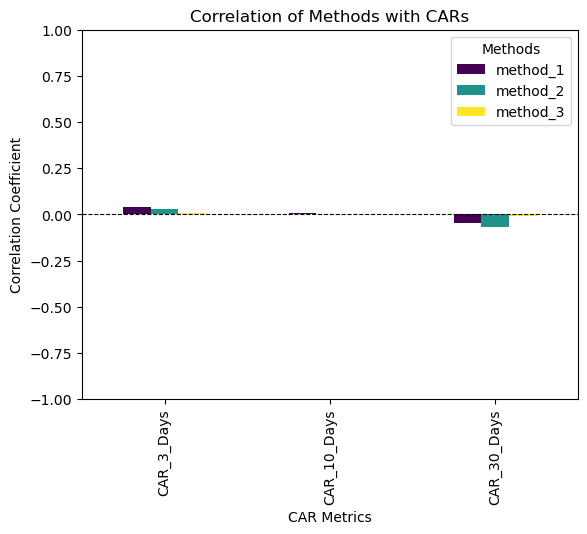

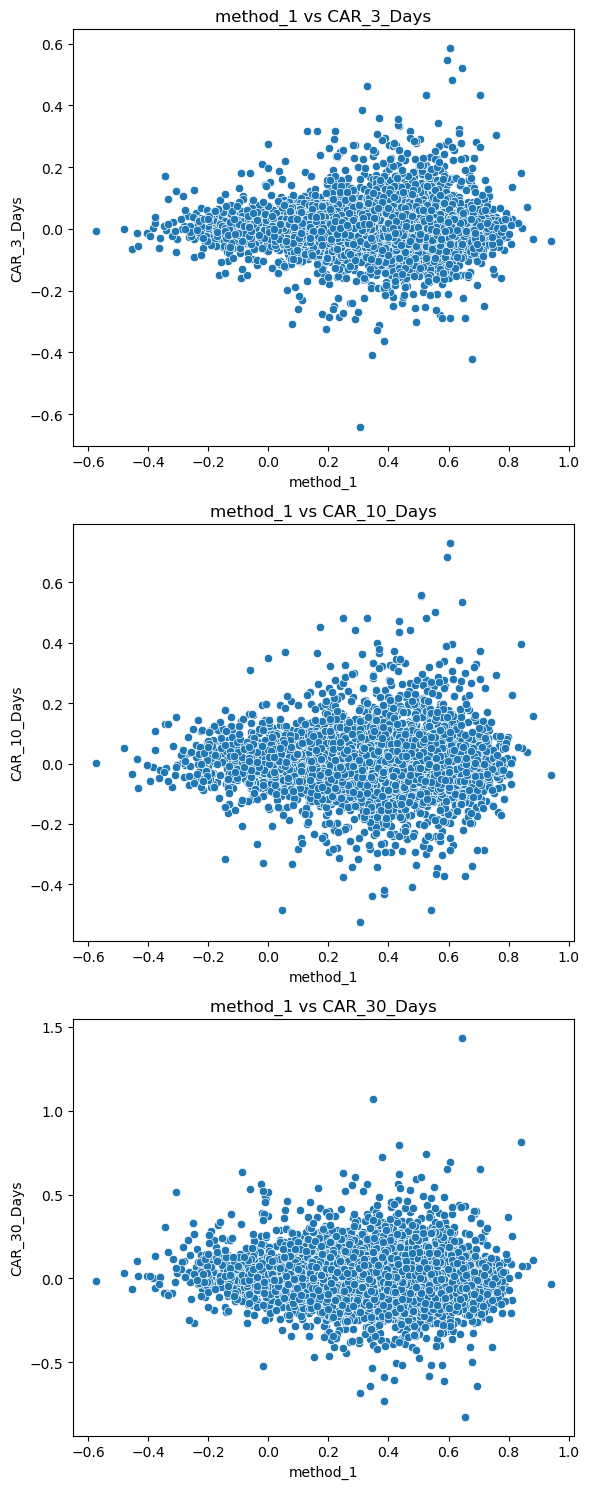

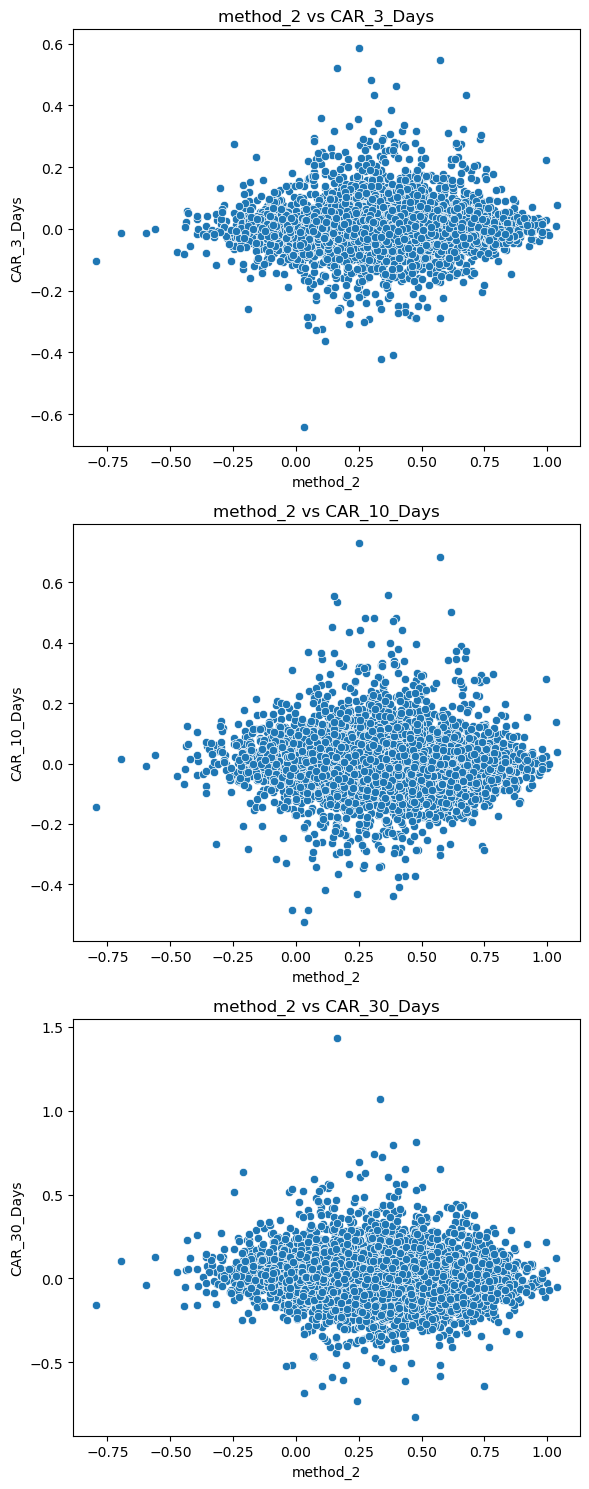

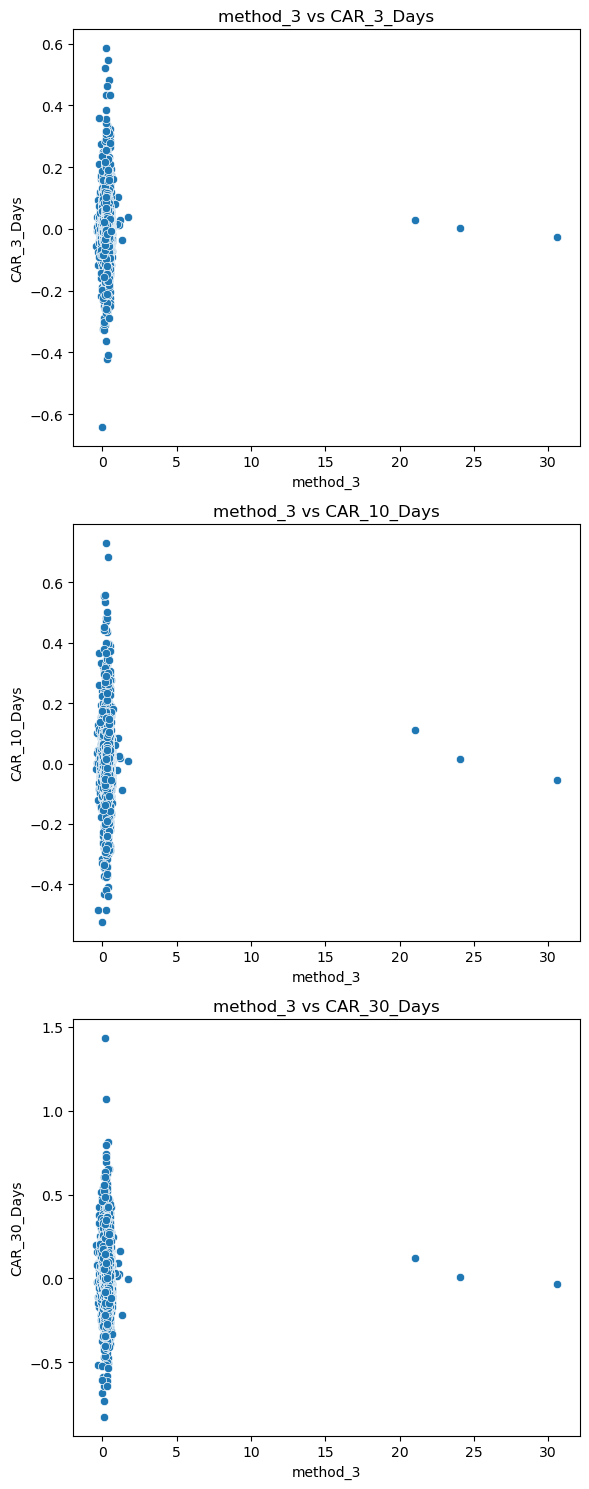

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target columns to check for missing values
target_columns = [
    "CAR_3_Days",
    "CAR_10_Days",
    "CAR_30_Days",
    "method_1",
    "method_2",
    "method_3",
    "method_3",
]

# Get the current directory
current_directory = os.getcwd()

# Initialize an empty list to store dataframes
df_list = []

# Loop through all folders in the current directory
for folder in os.listdir(current_directory):
    folder_path = os.path.join(current_directory, folder)

    # Check if it is a directory
    if os.path.isdir(folder_path):
        file_path = os.path.join(folder_path, "CAR_after_earnings.csv")

        # Check if the file exists
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                df_list.append(df)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Merge all dataframes
if df_list:
    merged_df = pd.concat(df_list, ignore_index=True)

    # Check missing values in target columns
    missing_counts = merged_df[target_columns].isnull().sum()
    print("Missing Data Counts:")
    print(missing_counts)

    # Drop rows where any target column has missing values
    cleaned_df = merged_df.dropna(subset=target_columns)

    print("Data after dropping missing values:")
    print(cleaned_df.head())

    # Selecting relevant columns for correlation
    columns_of_interest = [
        "CAR_3_Days",
        "CAR_10_Days",
        "CAR_30_Days",
        "method_1",
        "method_2",
        "method_3",
    ]
    df_subset = cleaned_df[columns_of_interest]

    # Compute correlation values
    correlation_values = (
        df_subset.corr()
        .drop(["method_1", "method_2", "method_3"])
        .loc[:, ["method_1", "method_2", "method_3"]]
    )

    # Bar chart for correlation values
    plt.figure(figsize=(8, 5))
    correlation_values.plot(kind="bar", cmap="viridis")
    plt.title("Correlation of Methods with CARs")
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("CAR Metrics")
    plt.ylim(-1, 1)
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.legend(title="Methods")
    plt.show()

    # Individual scatter plots for each method
    methods = ["method_1", "method_2", "method_3"]
    car_metrics = ["CAR_3_Days", "CAR_10_Days", "CAR_30_Days"]

    for method in methods:
        fig, axes = plt.subplots(3, 1, figsize=(6, 15))
        for i, car in enumerate(car_metrics):
            sns.scatterplot(ax=axes[i], x=cleaned_df[method], y=cleaned_df[car])
            axes[i].set_title(f"{method} vs {car}")
            axes[i].set_xlabel(method)
            axes[i].set_ylabel(car)
        plt.tight_layout()
        plt.show()
else:
    print("No CAR_after_earnings.csv files found in subdirectories.")
